### Importing libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
#plt.style.use('ggplot')
import missingno as msno

### reading Datasets

In [129]:
train=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/train.csv")
test=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/test.csv")

In [130]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
# shape of the dataset
print("Shape of the train dataset is {} rows and {} columns" .format(len(train),len(train.columns)))
print("Shape of the test dataset is {} rows and {} columns" .format(len(test),len(test.columns)))

Shape of the train dataset is 8523 rows and 12 columns
Shape of the test dataset is 5681 rows and 11 columns


In [132]:
# data types in the data set
dtypes=pd.DataFrame(train.dtypes,columns=["Data Types"])
dtypes

,Data Types
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [133]:
# Statstical summary of the dataset 
describe=train.describe(include =['float', 'int'])
describe.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060,8523,8523,8523,8523
mean,12.8576,0.066132,140.993,1997.83,2181.29
std,4.64346,0.0515978,62.2751,8.37176,1706.5
min,4.555,0,31.29,1985,33.29
25%,8.77375,0.0269895,93.8265,1987,834.247
50%,12.6,0.0539309,143.013,1999,1794.33
75%,16.85,0.0945853,185.644,2004,3101.3
max,21.35,0.328391,266.888,2009,13087


In [134]:
describe=train.describe(include=["O"])
describe

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


- `Item_Fat_Content` contains 2 categories
- `Item_Type` has 16 diff categories
- `Outlet_Identifier` has 10 categories
- `Outlet_Size` and `Outlet_Location_Type` has 3 categories
- `Outlet_type` has 4 categories

In [135]:
# checking for null values in train the dataset
null=pd.DataFrame(train.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(train.isna().sum()/len(train)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Item_Identifier,0,0
Item_Weight,1463,17.1653
Item_Fat_Content,0,0
Item_Visibility,0,0
Item_Type,0,0
Item_MRP,0,0
Outlet_Identifier,0,0
Outlet_Establishment_Year,0,0
Outlet_Size,2410,28.2764
Outlet_Location_Type,0,0


- As we can see that only 2 columns contain missing values
    - `item_Weight` has 17.16% null values
    - `Outlet_size` has 28.27% null values
    - later we have to fill this null values with suitable method

In [136]:
# checking for null values in test the dataset
null=pd.DataFrame(test.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(test.isna().sum()/len(test)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Item_Identifier,0,0
Item_Weight,976,17.1801
Item_Fat_Content,0,0
Item_Visibility,0,0
Item_Type,0,0
Item_MRP,0,0
Outlet_Identifier,0,0
Outlet_Establishment_Year,0,0
Outlet_Size,1606,28.2697
Outlet_Location_Type,0,0


- As we can see that only 2 columns contain missing values
    - `item_Weight` has 17.16% null values
    - `Outlet_size` has 28.27% null values
    - later we have to fill this null values with suitable method

In [137]:
# checking unique values in the categorical columns  of train dataset so we can check if this columns contain any duplicate values.
cols=train.select_dtypes(include="object")
for col in cols:
    print(col)
    print("="*80)
    unique=train[col].unique()
    print(unique)
    print("="*80)

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


- as we can see that only 1 column contain duplicate values
    - `Item_Fat_Content` has duplicate values ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
    - Here we have to replace duplicate low fat values with single Low Fat value
    - So we will replace low fat,LF ---> Low Fat
    - And Reg ---> Regular

In [138]:
# checking unique values in the categorical columns of test data so we can check if this columns contain any duplicate values.
cols=test.select_dtypes(include="object")
for col in cols:
    print(col)
    print("="*80)
    unique=test[col].unique()
    print(unique)
    print("="*80)

Item_Identifier
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Item_Fat_Content
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Type
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Identifier
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Size
['Medium' nan 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


- as we can see that only 1 column contain duplicate values
    - `Item_Fat_Content` has duplicate values ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
    - Here we have to replace duplicate low fat values with single Low Fat value
    - So we will replace low fat,LF ---> Low Fat
    - And Reg ---> Regular

In [139]:
# Replacing this values in train and test dataset.
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"})
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace({"reg":"Regular","LF":"Low Fat","low fat":"Low Fat"})

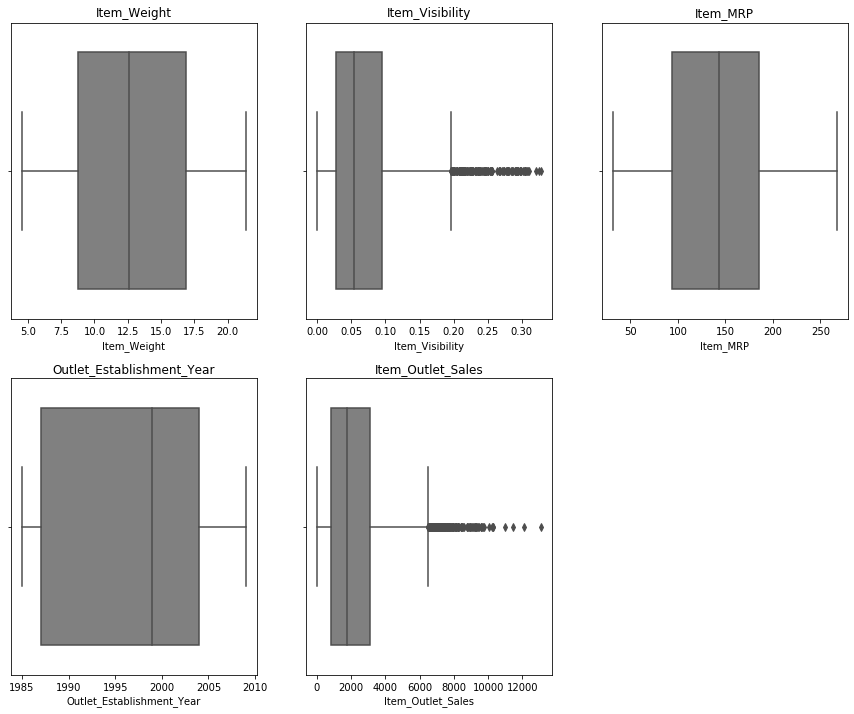

In [140]:
# checking for outliers
box_cols=train.select_dtypes(exclude="O")
q=1
plt.figure(figsize=(15,12))
for i in box_cols:
    plt.subplot(2,3,q)
    plt.title(i)
    sns.boxplot(train[i],color="grey")
    q+=1
plt.show()

- `item_visibility` has outliers
- `item_Outlet_sales` also contain outliers

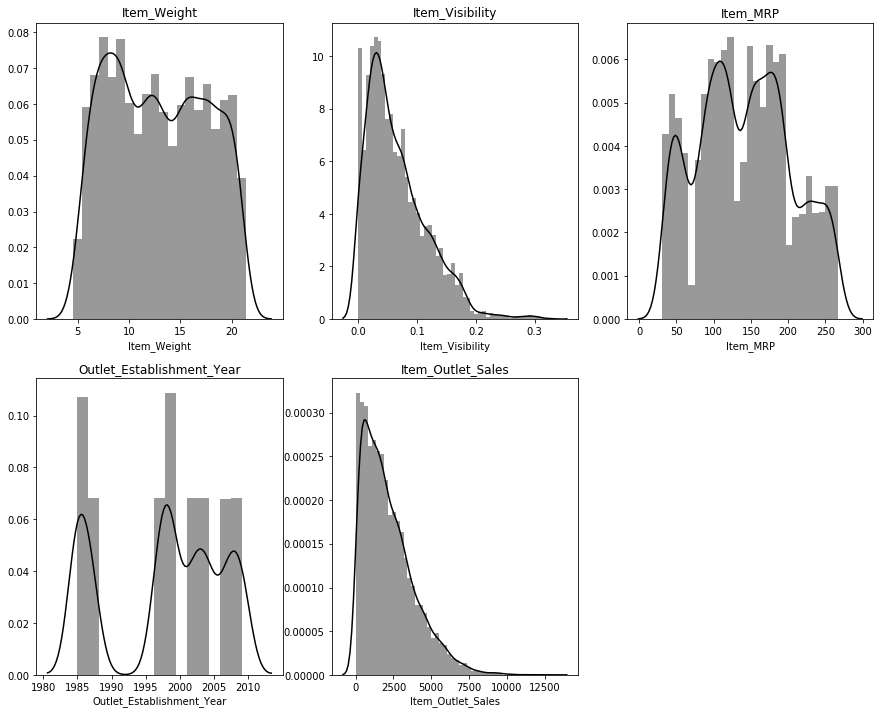

In [141]:
# checking for outliers
box_cols=train.select_dtypes(exclude="O")
q=1
plt.figure(figsize=(15,12))
for i in box_cols:
    plt.subplot(2,3,q)
    plt.title(i)
    sns.distplot(train[i].dropna(),color="black")
    q+=1
plt.show()

In [142]:
cntplot_cols=train.select_dtypes(include="O")
cntplot_cols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

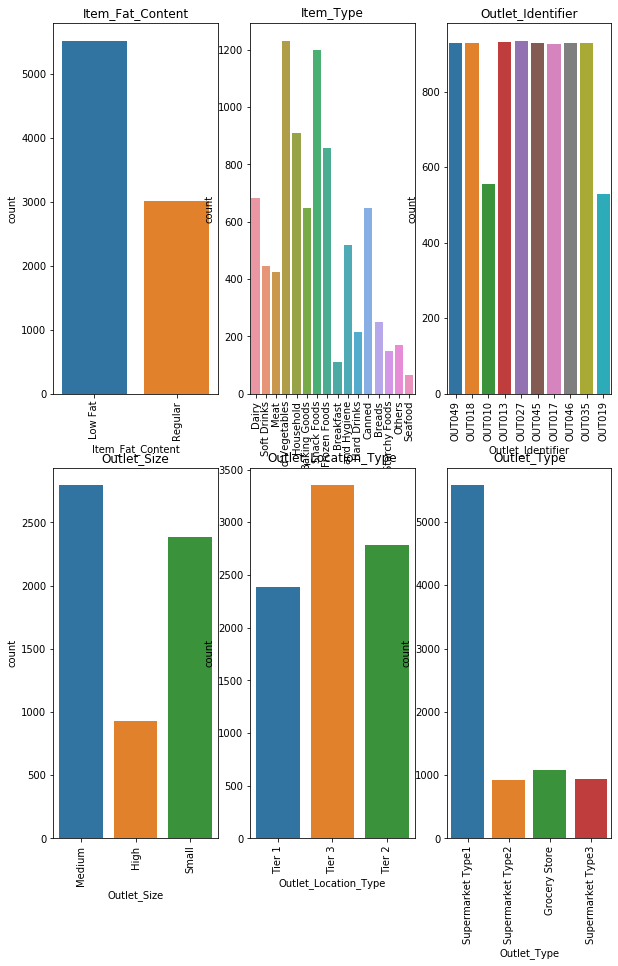

In [143]:
cntplot_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
q=1
plt.figure(figsize=(10,15))
for i in cntplot_cols:
    plt.subplot(2,3,q)
    plt.title(i)
    sns.countplot(train[i])
    plt.xticks(rotation=90)
    q+=1
plt.show()

In [144]:
# null value treatment
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [145]:
# null value treatment
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [146]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
# encoding categorical variables
train=pd.get_dummies(train,columns=['Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],drop_first=True)


In [148]:
train.shape

(8523, 30)

In [149]:
test=pd.get_dummies(test,columns=['Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],drop_first=True)

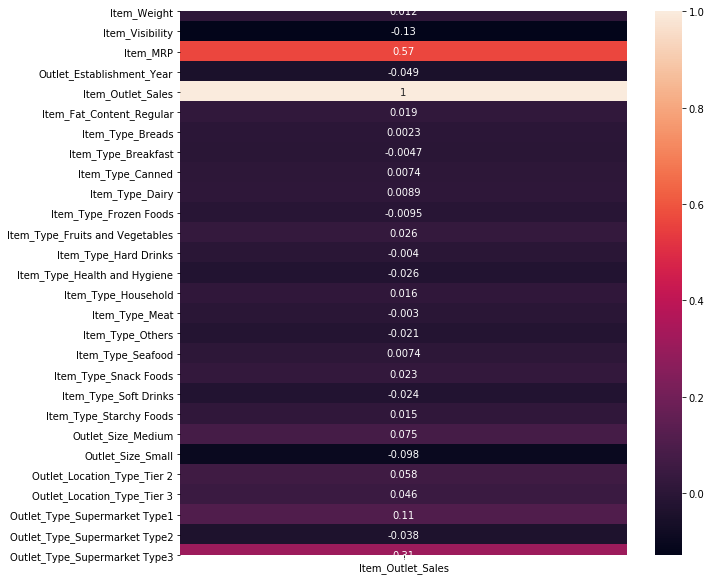

In [150]:
# correlation plots
plt.figure(figsize=(10,10))
corr=pd.DataFrame(train.corr()["Item_Outlet_Sales"])
sns.heatmap(corr,annot=True)

In [151]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [152]:
from sklearn.model_selection import train_test_split
X=train.drop(["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)
y=np.log(train["Item_Outlet_Sales"])
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(5966, 26)
(2557, 26)
(2557,)


### Linear regression

In [153]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7175701977194485
R^2 score for test: 0.7265567437997085


In [154]:
test=test.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)

In [155]:
model1= lin_reg.fit(X,y)
y_pred=model.predict(test)

In [156]:
model1.score(X,y)

0.7207539245590289

### RANDOM FOREST

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
rf=RandomForestRegressor( n_estimators=300)
model=rf.fit(X,y)
y_pred1=model.predict(test)
y_pred1=pd.DataFrame(np.exp(y_pred1))

In [162]:
rf.score(X,y)

0.9592099815644115

In [163]:
# Submission File
test1=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/test.csv")
submission=test1[["Item_Identifier","Outlet_Identifier"]]
submission["Item_Outlet_Sales"]=y_pred1
submission.to_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/submissionrf.csv",index=False)

### Ridge

In [165]:
from sklearn.linear_model import Lasso,Ridge

In [170]:
rd=Ridge()
model=rd.fit(X,y)
y_pred1=model.predict(test)
y_pred1=pd.DataFrame(np.exp(y_pred1))

In [171]:
rd.score(X,y)

0.7207476891693738

In [172]:
# Submission File
test1=pd.read_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/test.csv")
submission=test1[["Item_Identifier","Outlet_Identifier"]]
submission["Item_Outlet_Sales"]=y_pred1
submission.to_csv("/users/akshay/desktop/Analytics Vidhya/Big mart sale prediction/submissionrd.csv",index=False)

In [ ]:
from sklaein